# **Minería de datos Rock y Pop**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('generos_canciones.csv')

In [ ]:
df.shape

(11095, 58)

Considerando que se cuenta con una etiqueta que se puede utilizar como variable objetivo, se propone la utilización de un modelo de aprendizaje supervisado.

In [ ]:
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.382263,0.094524,0.208119,0.011205,3948.467813,1.286981e+06,3249.709546,111430.888942,7942.190693,1.935086e+06,0.200391,0.014839,-0.000125,0.015114,-0.000279,0.028516,99.384014,-64.094788,6171.074219,34.571281,1005.195435,34.711102,679.352173,24.733843,285.868866,0.171710,192.115814,3.736710,130.465378,6.103411,184.315979,-2.533328,148.8820343017578,0.321607,114.535866,2.529055,66.615501,-3.715382,113.016464,3.153918504714966,76.021324,-2.852413,88.250435,-3.768450,74.331940,-1.640852,63.944592,-1.778028,66.017311,-2.591676,36.738152,-2.630951,49.109962,2.922665,108.591919,1.708618,209.551987,pop
1,0.369070,0.091696,0.151808,0.003467,1177.030782,2.857194e+05,1713.879338,145014.737759,2429.193773,1.801259e+06,0.035693,0.000597,-0.000021,0.015498,0.000061,0.004972,184.570312,-174.737411,3946.710693,143.496033,618.096130,-1.676677,289.943085,32.533001,119.184898,5.560651,202.002182,30.831848,139.422058,6.747976,123.592407,21.302940,87.35200500488281,-14.237836,96.678345,13.284908,51.775406,-2.511899,87.083832,8.708471298217773,43.831768,-1.179942,64.923615,4.718913,36.117771,-0.180634,77.121010,3.562128,30.452106,-0.053136,48.737297,-2.007334,51.740837,-0.343240,33.199490,0.754715,42.345673,rock
2,0.439801,0.097289,0.216433,0.011811,4039.939283,1.393588e+06,3347.354324,125860.910826,8345.938251,2.495570e+06,0.166932,0.011811,0.000004,0.035292,0.000112,0.012040,89.102909,-60.365303,4008.480713,28.709740,1178.708374,11.818358,674.318054,22.511343,211.672455,15.973869,101.451927,0.153910,187.450211,13.408844,115.798691,-0.258936,89.03895568847656,5.587189,95.922310,3.310180,124.608688,1.974285,92.346321,2.072437524795532,106.109390,3.407105,127.607452,0.557017,119.030045,-0.990652,75.970291,-2.819151,63.827209,0.709151,80.629990,0.813116,102.600197,0.711861,50.933399,-4.277350,73.610710,pop
3,0.502668,0.073049,0.170057,0.002187,2067.199775,1.561185e+05,2245.961568,39272.359962,4654.567495,7.673725e+05,0.090058,0.000794,-0.001460,0.009945,-0.000861,0.010120,112.347147,-66.292725,3069.389404,108.211823,204.562347,-20.235228,118.555412,48.164333,187.761444,-10.113791,100.704475,33.869801,73.001190,-14.236749,100.507660,24.483620,60.31412506103516,-17.336754,87.337929,18.750364,85.268547,-9.070691,63.246590,13.957996368408203,32.950344,-13.773741,45.208431,9.181350,39.299267,-6.031580,22.206209,3.568381,38.967495,-10.421215,51.021694,5.945261,30.505136,-6.111493,30.439564,2.758008,39.204010,rock
4,0.452496,0.067200,0.102053,0.000199,2332.150837,5.641794e+04,2015.233941,14751.781284,4395.920598,2.196508e+05,0.141346,0.000400,0.000003,0.005179,-0.000028,0.001912,89.102909,-76.820160,705.625122,102.497498,125.014694,-54.678883,35.732136,49.501217,55.386795,-15.136765,50.077435,19.664509,28.769310,-25.128881,47.868229,14.833178,48.32421112060547,-19.480526,32.454239,16.985403,28.865881,-19.280094,23.713905,10.609190940856934,23.917782,-15.926483,12.905285,8.786722,17.936584,-12.262838,23.262779,0.924089,34.394329,-16.713825,30.026983,-1.417212,24.359451,-16.680574,22.053429,-0.461400,35.607296,rock


## **Limpieza y preprocesamiento de los datos**

Se modificó el tipo de dos variables que fueron identificadas de forma inadecuada (como cadenas de caracteres, siendo flotantes).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         11095 non-null  float64
 1   chroma_stft_var          11095 non-null  float64
 2   rms_mean                 11095 non-null  float64
 3   rms_var                  11095 non-null  float64
 4   spectral_centroid_mean   11095 non-null  float64
 5   spectral_centroid_var    11095 non-null  float64
 6   spectral_bandwidth_mean  11095 non-null  float64
 7   spectral_bandwidth_var   11095 non-null  float64
 8   rolloff_mean             11095 non-null  float64
 9   rolloff_var              11095 non-null  float64
 10  zero_crossing_rate_mean  11095 non-null  float64
 11  zero_crossing_rate_var   11095 non-null  float64
 12  harmony_mean             11095 non-null  float64
 13  harmony_var              11095 non-null  float64
 14  perceptr_mean         

In [ ]:
df['mfcc8_var'] = pd.to_numeric(df['mfcc8_var'], errors='coerce')

In [ ]:
df['mfcc8_var'].isnull().sum()

1

In [ ]:
df['mfcc12_mean'] = pd.to_numeric(df['mfcc12_mean'], errors='coerce')

In [ ]:
df['mfcc12_mean'].isnull().sum()

2

In [ ]:
cols = ['mfcc8_var', 'mfcc12_mean']
for col in cols:
  df[col] = df[col].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         11095 non-null  float64
 1   chroma_stft_var          11095 non-null  float64
 2   rms_mean                 11095 non-null  float64
 3   rms_var                  11095 non-null  float64
 4   spectral_centroid_mean   11095 non-null  float64
 5   spectral_centroid_var    11095 non-null  float64
 6   spectral_bandwidth_mean  11095 non-null  float64
 7   spectral_bandwidth_var   11095 non-null  float64
 8   rolloff_mean             11095 non-null  float64
 9   rolloff_var              11095 non-null  float64
 10  zero_crossing_rate_mean  11095 non-null  float64
 11  zero_crossing_rate_var   11095 non-null  float64
 12  harmony_mean             11095 non-null  float64
 13  harmony_var              11095 non-null  float64
 14  perceptr_mean         

### **Tratamiento de valores ausentes**

Los registros con valores ausentes fueron eliminados en su totalidad, considerando que el porcentaje de valores ausentes para las variables que los padecen es menor al 0.1% de los datos.

In [ ]:
df.isnull().sum()/df.shape[0]*100

chroma_stft_mean           0.000000
chroma_stft_var            0.000000
rms_mean                   0.000000
rms_var                    0.000000
spectral_centroid_mean     0.000000
spectral_centroid_var      0.000000
spectral_bandwidth_mean    0.000000
spectral_bandwidth_var     0.000000
rolloff_mean               0.000000
rolloff_var                0.000000
zero_crossing_rate_mean    0.000000
zero_crossing_rate_var     0.000000
harmony_mean               0.000000
harmony_var                0.000000
perceptr_mean              0.000000
perceptr_var               0.000000
tempo                      0.000000
mfcc1_mean                 0.000000
mfcc1_var                  0.000000
mfcc2_mean                 0.000000
mfcc2_var                  0.000000
mfcc3_mean                 0.000000
mfcc3_var                  0.000000
mfcc4_mean                 0.000000
mfcc4_var                  0.000000
mfcc5_mean                 0.000000
mfcc5_var                  0.000000
mfcc6_mean                 0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(11093, 58)

In [ ]:
df.isnull().sum()/df.shape[0]*100

chroma_stft_mean           0.0
chroma_stft_var            0.0
rms_mean                   0.0
rms_var                    0.0
spectral_centroid_mean     0.0
spectral_centroid_var      0.0
spectral_bandwidth_mean    0.0
spectral_bandwidth_var     0.0
rolloff_mean               0.0
rolloff_var                0.0
zero_crossing_rate_mean    0.0
zero_crossing_rate_var     0.0
harmony_mean               0.0
harmony_var                0.0
perceptr_mean              0.0
perceptr_var               0.0
tempo                      0.0
mfcc1_mean                 0.0
mfcc1_var                  0.0
mfcc2_mean                 0.0
mfcc2_var                  0.0
mfcc3_mean                 0.0
mfcc3_var                  0.0
mfcc4_mean                 0.0
mfcc4_var                  0.0
mfcc5_mean                 0.0
mfcc5_var                  0.0
mfcc6_mean                 0.0
mfcc6_var                  0.0
mfcc7_mean                 0.0
mfcc7_var                  0.0
mfcc8_mean                 0.0
mfcc8_va

### **Tratamiento de valores atípicos**

Siendo que se requiere un modelo predictivo, es muy conveniente la eliminación de valores atípicos.

In [ ]:
df_ajuste = df.copy()

In [ ]:
df_ajuste.describe([i/100 for i in range(10, 100, 10)])

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,1.109300e+04,11093.000000,11093.000000,11093.000000,1.109300e+04,11093.000000,11093.000000,1.109300e+04,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000
mean,0.392407,0.085277,0.163479,0.003945,2660.438173,6.301144e+05,2639.202536,138736.764938,5669.430648,2.162748e+06,0.120332,0.004252,-2.337557e-04,0.017213,-0.000177,0.008880,122.011466,-89.736468,2720.243243,84.702490,646.034472,-1.497881,366.545256,27.830285,198.139898,2.241847,134.623003,11.380949,126.856792,-1.177113,99.721003,7.650486,78.336851,-3.379024,76.499384,6.629740,70.424752,-5.416503,61.320889,2.931200,53.877452,-4.188266,54.495404,0.458436,52.813307,-3.178518,51.139496,0.119153,50.876528,-3.392307,53.306207,0.566692,56.243875,-1.639997,57.866818,-0.440562,57.466096
std,0.065396,0.008856,0.067815,0.004575,725.649325,5.252166e+05,522.581107,108673.483375,1595.438778,1.606590e+06,0.042904,0.004898,1.370132e-03,0.014389,0.001039,0.008631,32.057294,68.425287,2380.864851,29.260698,459.552506,26.178572,251.391541,18.030091,122.365361,13.515629,84.696585,12.190925,89.469425,12.388228,59.598362,10.307729,48.365396,11.097592,44.340823,7.676758,39.307868,7.639280,34.723170,6.446920,28.650394,6.761465,33.447781,5.406159,44.603704,5.695590,38.633395,4.917032,41.136063,5.894998,39.137609,4.898137,43.689340,5.210773,44.074540,4.306229,43.047415
min,0.170542,0.051060,0.016261,0.000024,941.195138,1.765085e+04,1361.584034,5806.346903,1733.588492,8.113738e+04,0.022277,0.000073,-1.261454e-02,0.000174,-0.005578,0.000015,49.692007,-458.260742,101.481003,17.399992,50.070835,-94.460632,35.732136,-35.138493,14.852345,-47.886780,18.014965,-34.889263,11.369905,-45.187019,16.899103,-40.323467,12.893091,-39.451752,12.726326,-20.425932,11.848785,-33.077908,12.750665,-23.759195,12.782537,-28.179117,9.226981,-23.390091,12.380919,-20.922247,10.440582,-26.850016,7.907540,-20.480215,9.036826,-20.733809,10.344034,-18.970459,8.700255,-15.242114,8.696860
10%,0.307396,0.073899,0.079329,0.000354,1690.540449,1.255226e+05,1966.239849,45724.523865,3570.039438,5.816621e+05,0.064434,0.000521,-1.373440e-03,0.003765,-0.001328,0.000995,89.102909,-184.015778,683.918762,48.320503,212.425690,-38.742470,131.918457,6.762486,71.474403,-17.929319,53.313534,-2.282619,42.395519,-19.587872,40.531639,-3.651642,32.402184,-19.653505,32.597866,-2.149747,30.388535,-16.841387,28.130619,-4.845909,26.177363,-14.025206,25.613454,-6.352854,23.787859,-11.000228,23.893135,-5.563551,22.155222,-11.006923,22.166094,-5.066385,22.246357,-8.070033,22.985922,-5.619169,21.736532
20%,0.336348,0.078107,0.101925,0.000680,2016.750537,1.977290e+05,2134.732905,61662.341365,4272.270320,8.535087e+05,0.082264,0.000863,-2.132699e-04,0.005744,-0.000731,0.002116,99

In [ ]:
def hist_matrix(nrows, ncols, cols, dataframe, w=10, h=5, dpi=160):
  '''
  Función para generar una matriz de histogramas de las variables cuantitativas
  de un dataframe. Requiere la importación de matplotlib.pyplot como plt y de
  seaborn como sns.
  Parámetros:
  -nrows: int, Número de filas.
  -ncols: int, Número de columnas.
  -cols: list, Lista con los nombres de las columnas deseadas.
  -dataframe: pd.DataFrame, DataFrame deseado.
  -w: int, Ancho de cada figura.
  -h: int, Alto de cada figura.
  -dpi: int, Puntos por pulgada.
  '''
  i = 0
  f, axs = plt.subplots(nrows,ncols,figsize=(w,h), dpi=dpi, sharey=True)
  for r in range(nrows):
    for c in range(ncols):
      if nrows>1:
        sns.histplot(ax=axs[r][c], x=dataframe[cols[i]])
      else:
        sns.histplot(ax=axs[c], x=dataframe[cols[i]])
      i+=1
  plt.tight_layout()

In [ ]:
def drop_outliers_iqr(dataframe, series, iqr_weight):
  '''
  Función para modificar un dataframe eliminando los valores atípicos con base
  en el criterio del rango intercuartílico.
  -dataframe: pd.DataFrame, DataFrame deseado.
  -series: str, Nombre de la columna deseada.
  '''
  print(f'Dimensiones del conjunto de datos: {dataframe.shape}\n')
  q1=dataframe[series].quantile(.25)
  q3=dataframe[series].quantile(.75)
  iqr=q3-q1
  print(f'q1: {q1}\nq3: {q3}\niqr: {iqr}\n')
  new_df = dataframe[~((dataframe[series]<q1-iqr_weight*iqr)|(dataframe[series]>q3+iqr_weight*iqr))]
  print(f'Nuevas dimensiones del conjunto de datos: {new_df.shape}\n')
  return new_df

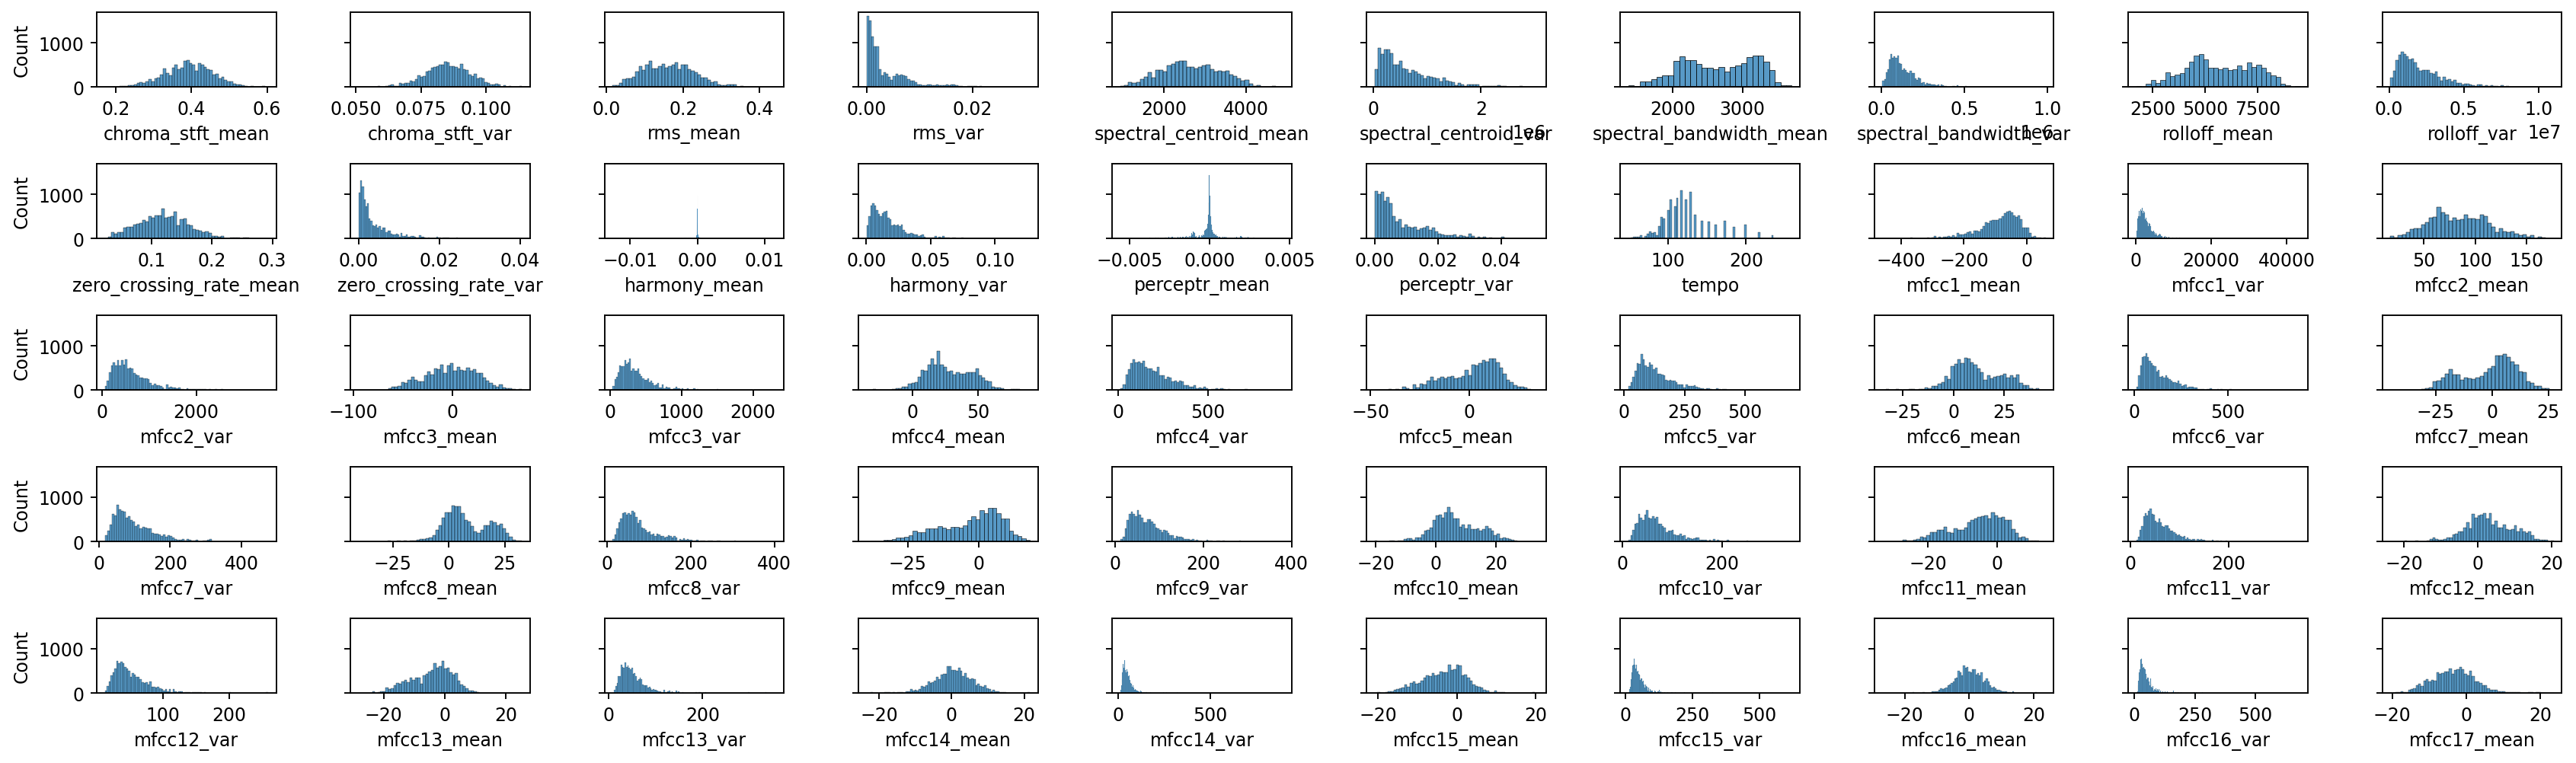

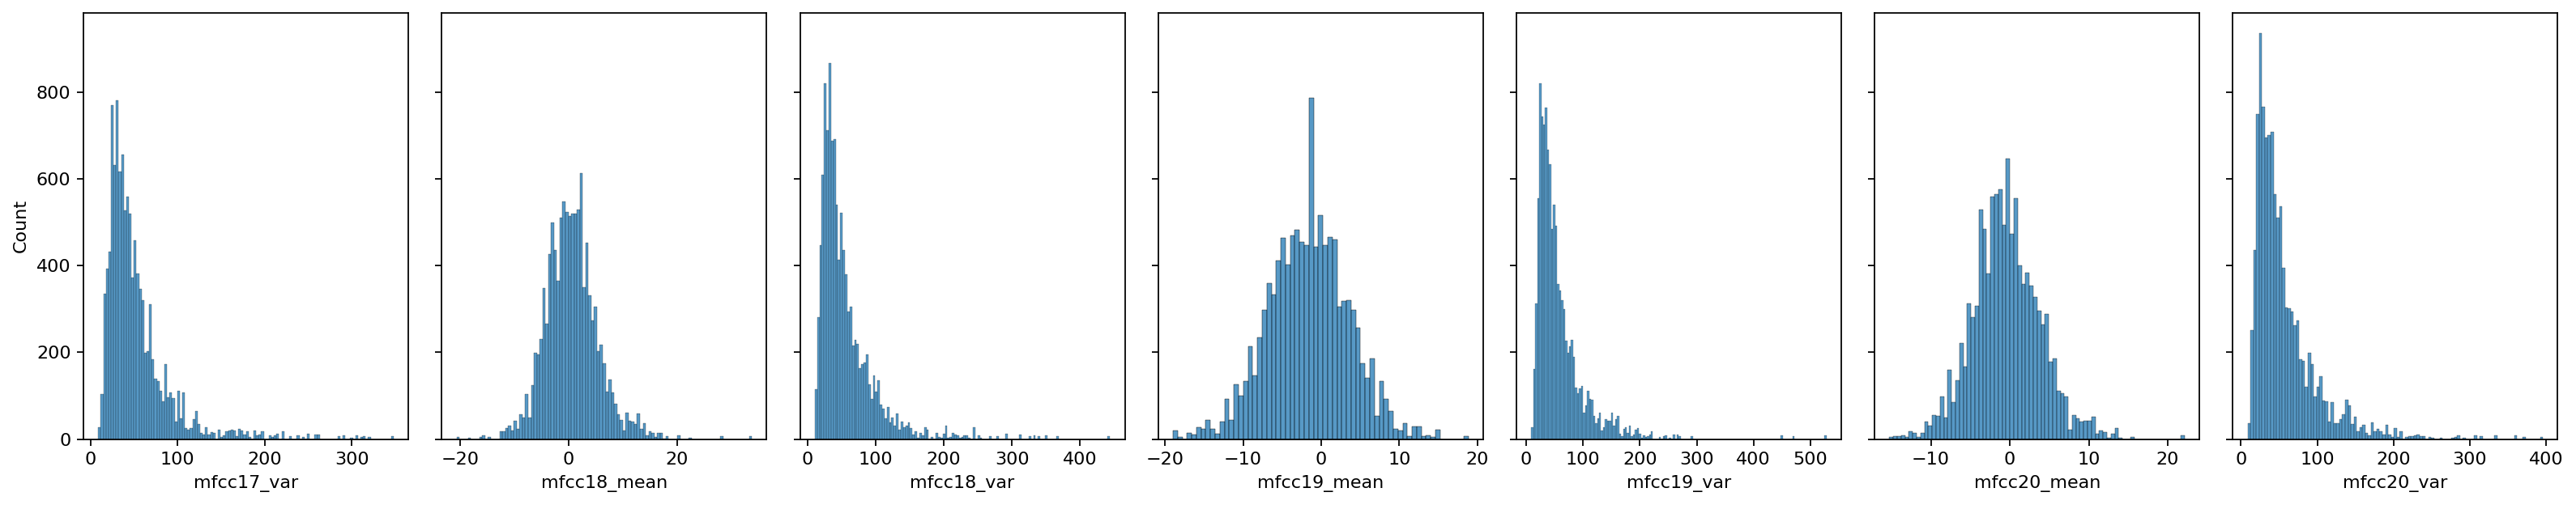

In [ ]:
hist_matrix(5, 10, df_ajuste.columns[:50], df_ajuste, w=20, h=6, dpi=170)
hist_matrix(1, 7, df_ajuste.columns[50:], df_ajuste, w=20, h=4, dpi=160)

In [ ]:
cols = df.columns
for col in cols[:-1]:
  print(f'{col}:')
  df_ajuste = drop_outliers_iqr(df_ajuste, col, 1.5)

chroma_stft_mean:
Dimensiones del conjunto de datos: (11093, 58)

q1: 0.3504168093204498
q3: 0.4372455179691314
iqr: 0.08682870864868164

Nuevas dimensiones del conjunto de datos: (11004, 58)

chroma_stft_var:
Dimensiones del conjunto de datos: (11004, 58)

q1: 0.0796732082962989
q3: 0.09124229662120335
iqr: 0.011569088324904456

Nuevas dimensiones del conjunto de datos: (10917, 58)

rms_mean:
Dimensiones del conjunto de datos: (10917, 58)

q1: 0.1114277616143226
q3: 0.2081652134656906
iqr: 0.096737451851368

Nuevas dimensiones del conjunto de datos: (10854, 58)

rms_var:
Dimensiones del conjunto de datos: (10854, 58)

q1: 0.0008102696738205
q3: 0.0058129779063165
iqr: 0.005002708232496

Nuevas dimensiones del conjunto de datos: (10209, 58)

spectral_centroid_mean:
Dimensiones del conjunto de datos: (10209, 58)

q1: 2099.4644303103782
q3: 3091.73967608904
iqr: 992.2752457786619

Nuevas dimensiones del conjunto de datos: (10158, 58)

spectral_centroid_var:
Dimensiones del conjunto de da

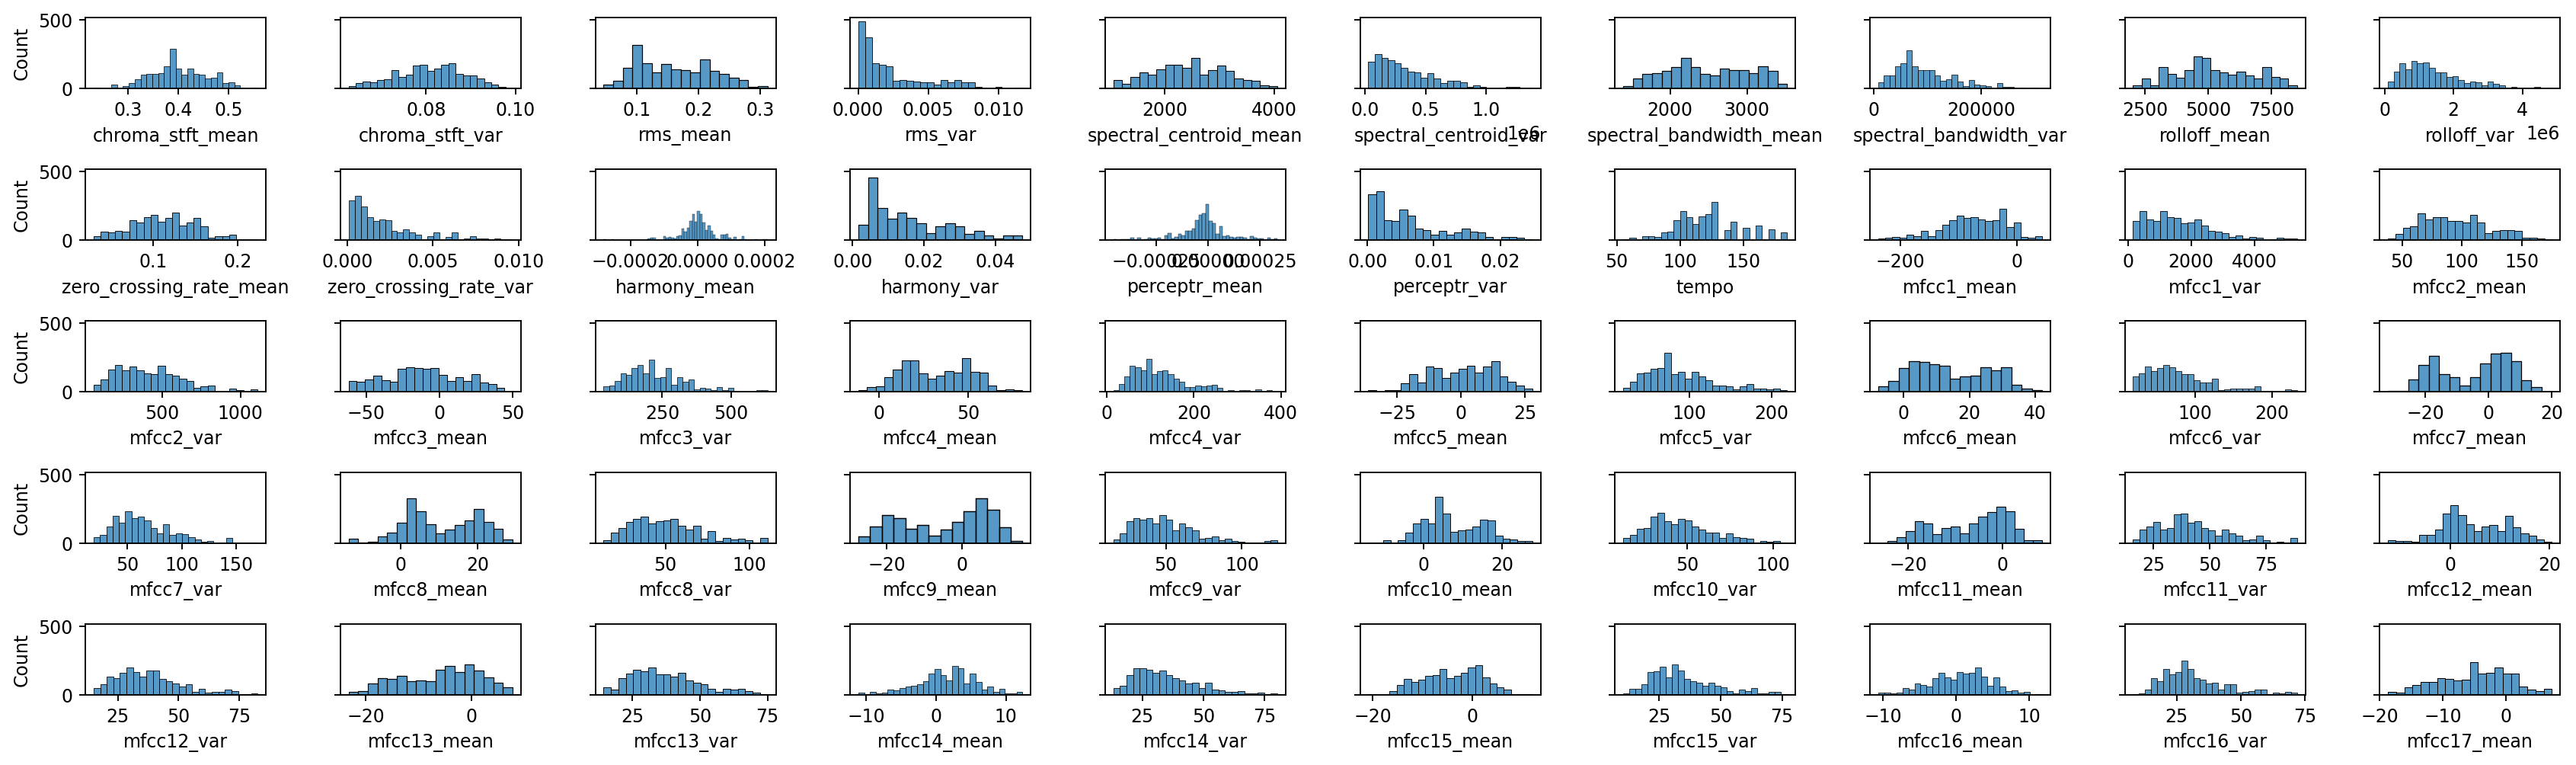

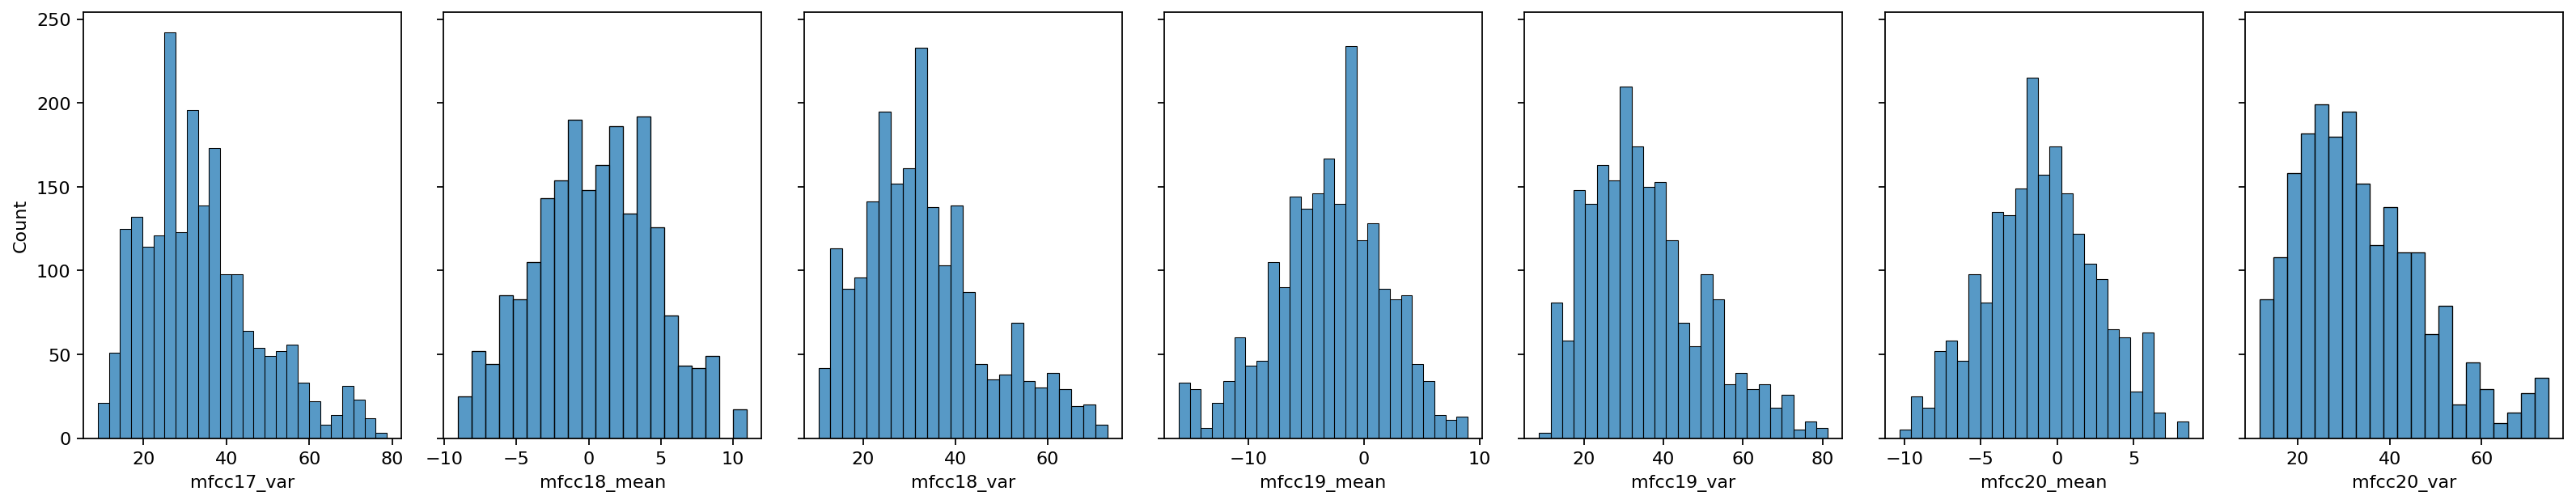

In [ ]:
hist_matrix(5, 10, df_ajuste.columns[:50], df_ajuste, w=20, h=6, dpi=170)
hist_matrix(1, 7, df_ajuste.columns[50:], df_ajuste, w=20, h=4, dpi=160)

In [ ]:
1 - df_ajuste.shape[0]/df.shape[0]

0.8148381862435771

Utilizando el criterio del rango intercuartílico para el tratamiento de valores atípicos del conjunto de datos en todas las variables del conjunto, se perdió el 81% de los registros usando el valor común para el peso del rango intercuartílico (1.5).

Con el fin de reducir el número de registros perdidos, se probaron distintos pesos para el criterio del rango intercuartílico.

In [ ]:
df_ajuste = df.copy()

In [ ]:
cols = df.columns
for col in cols[:-1]:
  print(f'{col}:')
  df_ajuste = drop_outliers_iqr(df_ajuste, col, 3)

chroma_stft_mean:
Dimensiones del conjunto de datos: (11093, 58)

q1: 0.3504168093204498
q3: 0.4372455179691314
iqr: 0.08682870864868164

Nuevas dimensiones del conjunto de datos: (11093, 58)

chroma_stft_var:
Dimensiones del conjunto de datos: (11093, 58)

q1: 0.0796459466218948
q3: 0.0912169590592384
iqr: 0.011571012437343611

Nuevas dimensiones del conjunto de datos: (11093, 58)

rms_mean:
Dimensiones del conjunto de datos: (11093, 58)

q1: 0.1117301061749458
q3: 0.2082783281803131
iqr: 0.0965482220053673

Nuevas dimensiones del conjunto de datos: (11093, 58)

rms_var:
Dimensiones del conjunto de datos: (11093, 58)

q1: 0.0008108508191071
q3: 0.0058662919327616
iqr: 0.0050554411136545

Nuevas dimensiones del conjunto de datos: (10996, 58)

spectral_centroid_mean:
Dimensiones del conjunto de datos: (10996, 58)

q1: 2121.923051194152
q3: 3168.785714375021
iqr: 1046.8626631808693

Nuevas dimensiones del conjunto de datos: (10996, 58)

spectral_centroid_var:
Dimensiones del conjunto de 

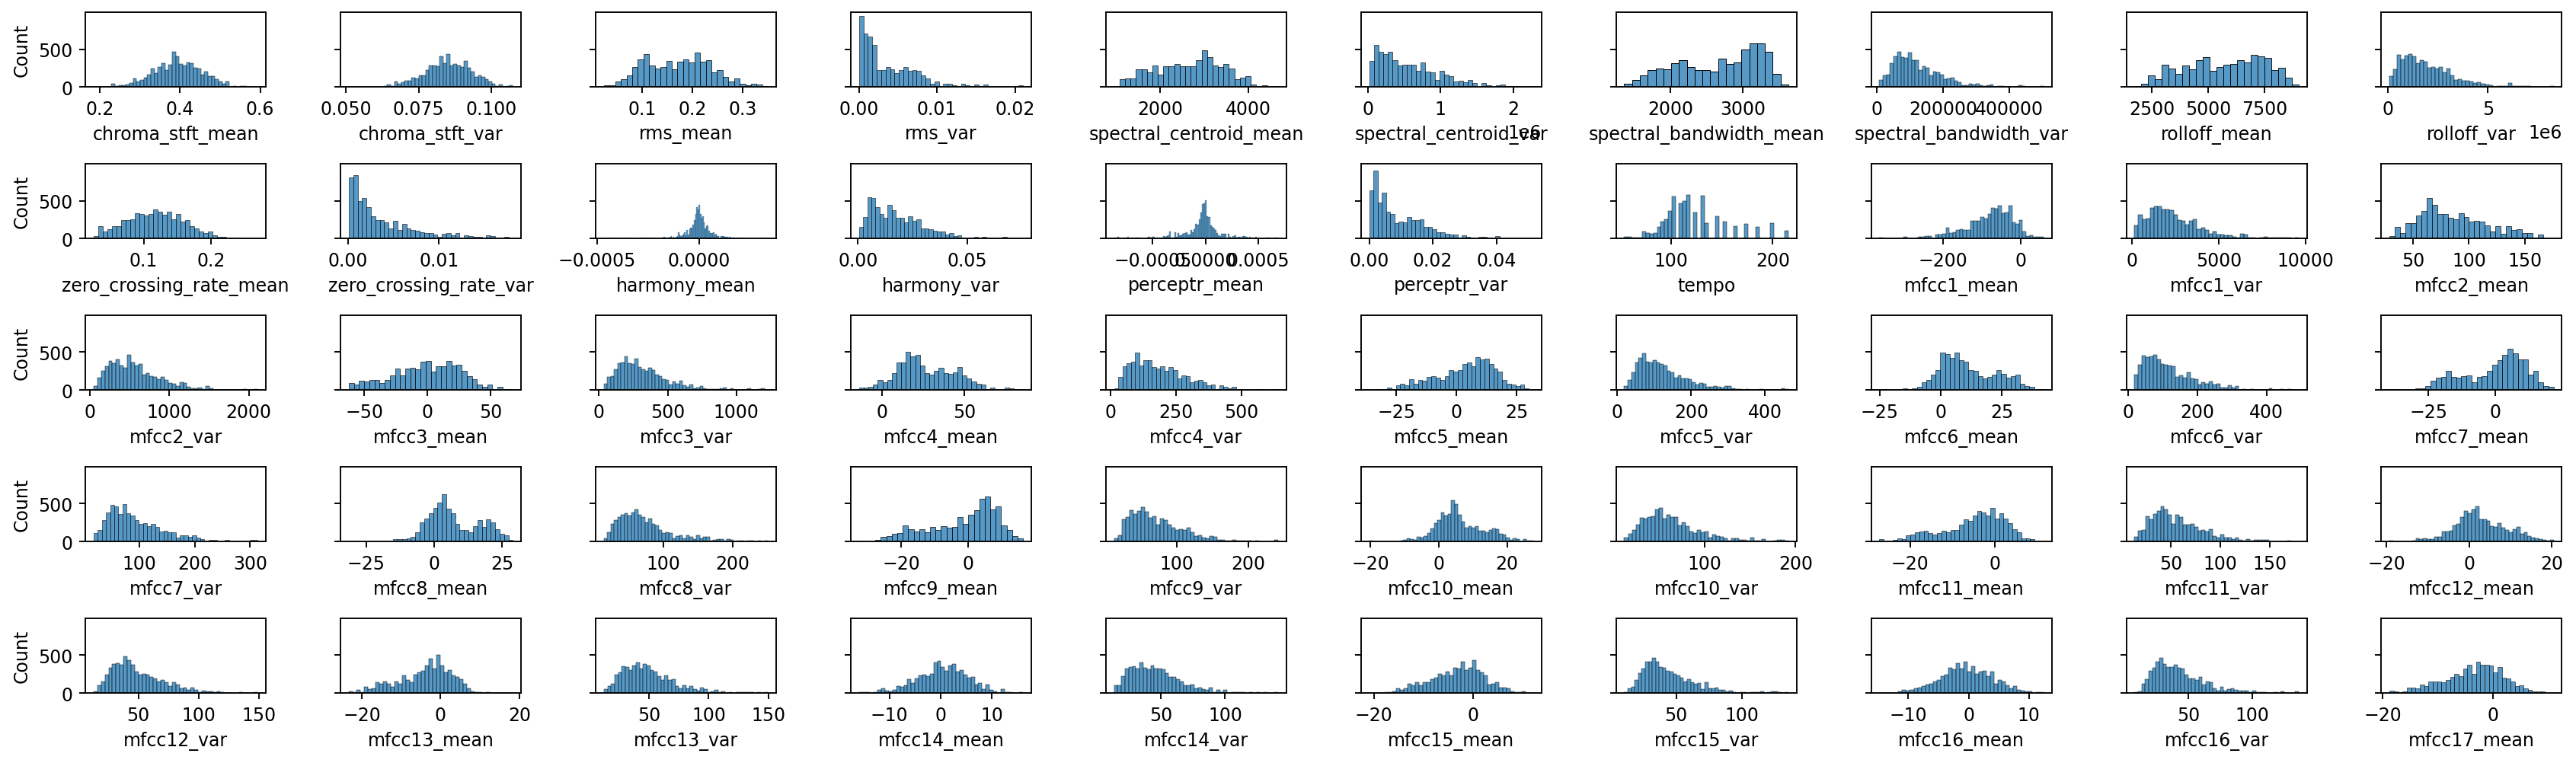

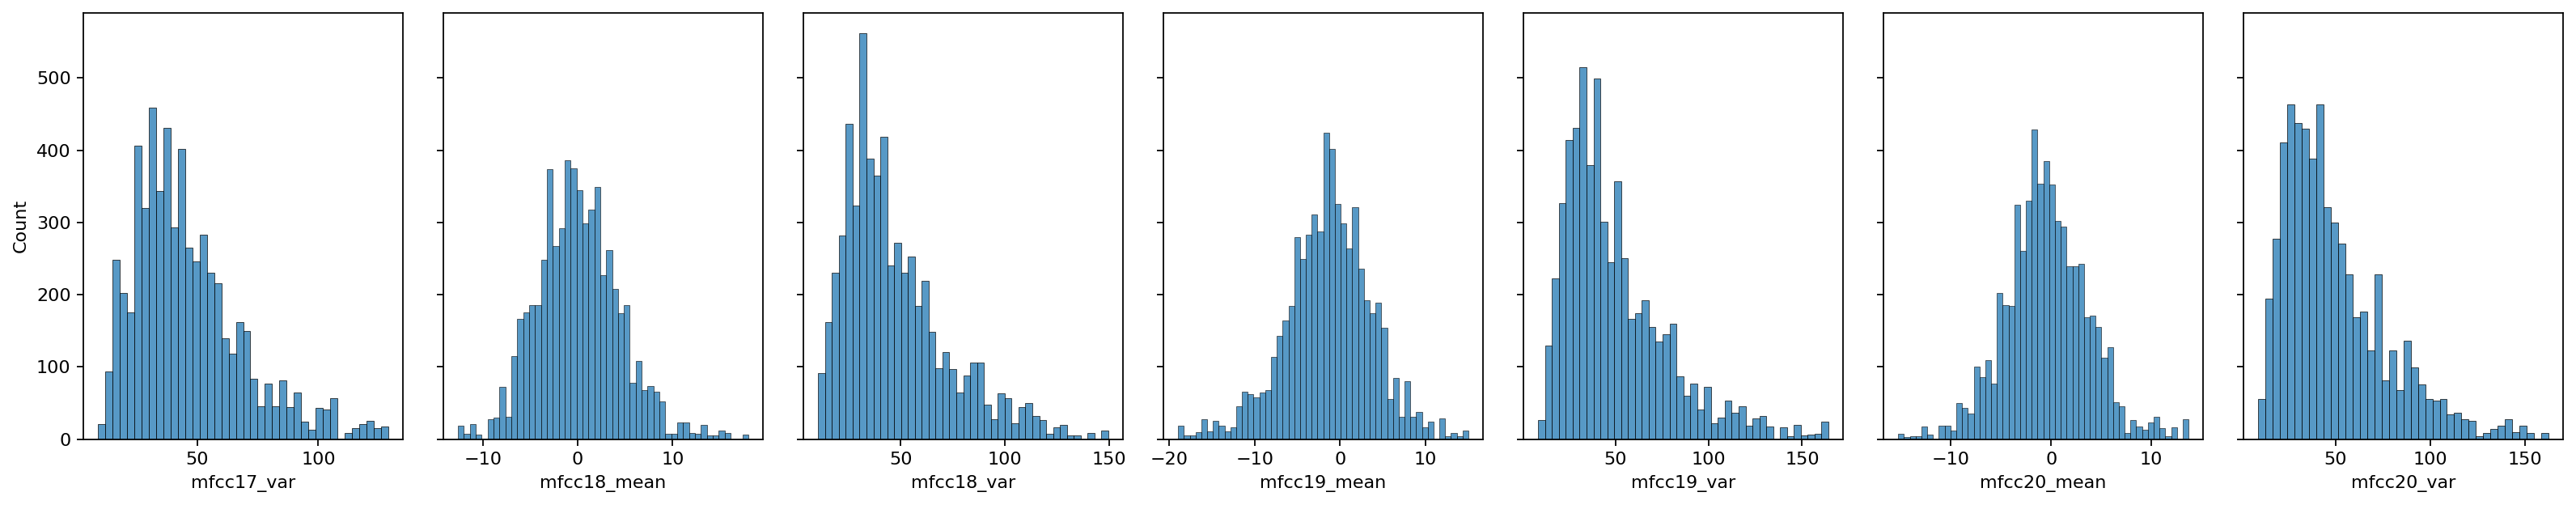

In [ ]:
hist_matrix(5, 10, df_ajuste.columns[:50], df_ajuste, w=20, h=6, dpi=170)
hist_matrix(1, 7, df_ajuste.columns[50:], df_ajuste, w=20, h=4, dpi=160)

In [ ]:
1 - df_ajuste.shape[0]/df.shape[0]

0.4656990895159109

Utilizando el doble de peso para el valor del rango intercuartílico (3), fue posible reducir el número de registros perdidos al 46%

## **Modelos predictivos**

In [ ]:
df_ajuste.reset_index(drop=True, inplace=True)

In [ ]:
X = df_ajuste[[col for col in df_ajuste.columns if col not in ['label']]].copy()

In [ ]:
X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.369070,0.091696,0.151808,0.003467,1177.030782,2.857194e+05,1713.879338,145014.737759,2429.193773,1.801259e+06,0.035693,0.000597,-0.000021,0.015498,0.000061,0.004972,184.570312,-174.737411,3946.710693,143.496033,618.096130,-1.676677,289.943085,32.533001,119.184898,5.560651,202.002182,30.831848,139.422058,6.747976,123.592407,21.302940,87.352005,-14.237836,96.678345,13.284908,51.775406,-2.511899,87.083832,8.708471,43.831768,-1.179942,64.923615,4.718913,36.117771,-0.180634,77.121010,3.562128,30.452106,-0.053136,48.737297,-2.007334,51.740837,-0.343240,33.199490,0.754715,42.345673
1,0.439801,0.097289,0.216433,0.011811,4039.939283,1.393588e+06,3347.354324,125860.910826,8345.938251,2.495570e+06,0.166932,0.011811,0.000004,0.035292,0.000112,0.012040,89.102909,-60.365303,4008.480713,28.709740,1178.708374,11.818358,674.318054,22.511343,211.672455,15.973869,101.451927,0.153910,187.450211,13.408844,115.798691,-0.258936,89.038956,5.587189,95.922310,3.310180,124.608688,1.974285,92.346321,2.072438,106.109390,3.407105,127.607452,0.557017,119.030045,-0.990652,75.970291,-2.819151,63.827209,0.709151,80.629990,0.813116,102.600197,0.711861,50.933399,-4.277350,73.610710
2,0.452496,0.067200,0.102053,0.000199,2332.150837,5.641794e+04,2015.233941,14751.781284,4395.920598,2.196508e+05,0.141346,0.000400,0.000003,0.005179,-0.000028,0.001912,89.102909,-76.820160,705.625122,102.497498,125.014694,-54.678883,35.732136,49.501217,55.386795,-15.136765,50.077435,19.664509,28.769310,-25.128881,47.868229,14.833178,48.324211,-19.480526,32.454239,16.985403,28.865881,-19.280094,23.713905,10.609191,23.917782,-15.926483,12.905285,8.786722,17.936584,-12.262838,23.262779,0.924089,34.394329,-16.713825,30.026983,-1.417212,24.359451,-16.680574,22.053429,-0.461400,35.607296
3,0.441660,0.069813,0.084988,0.000131,1909.218274,8.977249e+04,1934.266970,62207.990545,3874.320162,6.351552e+05,0.098437,0.000568,0.000007,0.004189,-0.000043,0.000973,117.453835,-120.670975,817.289307,126.536926,243.392899,-44.471268,177.035400,53.232796,34.586552,-11.134586,40.183640,26.546534,42.274052,-18.358093,37.417267,26.000435,23.047558,-20.845781,23.929920,5.719593,34.841839,-14.922313,23.044167,12.287600,23.233707,-17.731791,20.804510,3.168964,26.616592,-9.107185,20.128229,3.243474,15.520183,-6.517961,17.916306,3.734142,15.448043,-3.015924,32.357418,-0.146940,27.253016
4,0.428684,0.100945,0.181407,0.007514,3062.429421,8.008748e+05,3046.379252,100814.254006,6807.970628,2.256155e+06,0.116710,0.008004,0.000042,0.014213,-0.000042,0.017508,78.302557,-76.913239,2965.300049,58.916149,875.528809,10.014507,294.125397,20.931335,270.830658,10.558357,210.780594,4.555059,469.776855,8.704227,151.925690,4.305101,101.213165,10.138993,108.701622,7.641514,166.376968,2.340675,54.672169,7.209795,68.309837,5.711912,50.153221,4.362331,44.060432,5.152265,57.288086,-2.903199,37.027660,-7.557349,51.666164,-5.297555,48.722267,-1.496702,55.553177,3.038613,52.309315


In [ ]:
y = df_ajuste[['label']].copy()

In [ ]:
y.head()

,label
0,rock
1,pop
2,rock
3,rock
4,pop


In [ ]:
y.value_counts()

label
pop      3526
rock     2401
dtype: int64

In [ ]:
y.replace({'pop':0, 'rock':1}, inplace=True)

In [ ]:
y.head()

,label
0,1
1,0
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ***Árbol de decisión***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [ ]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( ' ROC: %.3f' %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( ' Accuracy: %.3f' %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( ' Matriz de confusión: ', "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [ ]:
metricas(classifier,X_test, y_test)

 ROC: 0.997
 Accuracy: 0.996
 Matriz de confusión:  
 [[1162    8]
 [   0  786]]


In [ ]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

El resultado de las métricas ROC y Accuracy del árbol de decisión muestran que posiblemente hubo un sobre-ajuste. Por ello, se redujo la profundidad máxima del árbol de decisión a 1. Con base en los resultados obtenidos, se propone que un modelo adecuado sería un árbol de decisión con una profundidad máxima de 2.

In [ ]:
classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
metricas(classifier,X_test, y_test)

 ROC: 0.872
 Accuracy: 0.882
 Matriz de confusión:  
 [[1077   93]
 [ 138  648]]


In [ ]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

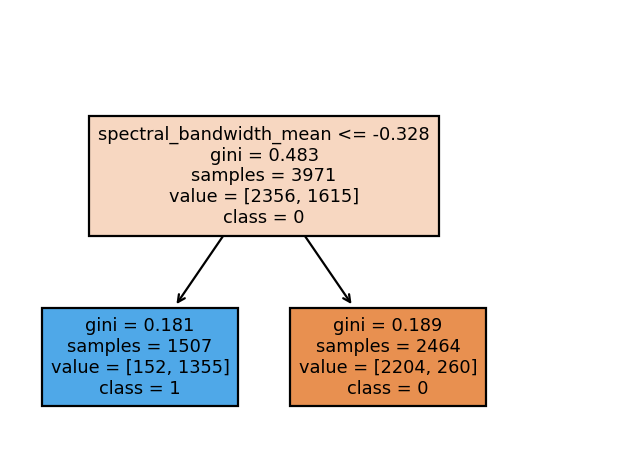

In [ ]:
from sklearn.tree import plot_tree, export_graphviz
fig = plt.figure(figsize=(4,3), dpi=160)
_ = plot_tree(classifier, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True,fontsize=8)
plt.tight_layout()

In [ ]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
metricas(classifier,X_test, y_test)

 ROC: 0.971
 Accuracy: 0.915
 Matriz de confusión:  
 [[1154   16]
 [ 151  635]]


In [ ]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

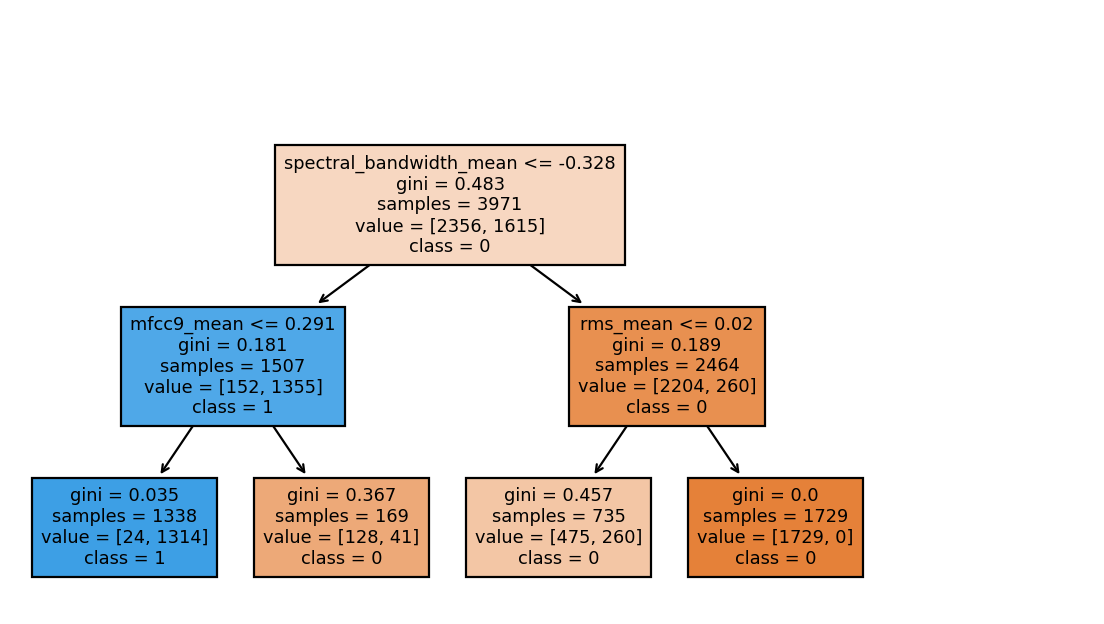

In [ ]:
from sklearn.tree import plot_tree, export_graphviz
fig = plt.figure(figsize=(7,4), dpi=160)
_ = plot_tree(classifier, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True,fontsize=8)
plt.tight_layout()

### ***Perceptrón multicapa***

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=100)

In [ ]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
metricas(mlp,X_test,y_test)

 ROC: 1.000
 Accuracy: 1.000
 Matriz de confusión:  
 [[1170    0]
 [   0  786]]


In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

El perceptrón multicapa muestra un sobre-ajuste todavía mayor que el del primer árbol de decisión.

Con base en ello, se propone que el mejor modelo de los que fueron probados es el árbol de decisión clasificador de máxima profundidad de 2.